In [1]:
import numpy as np
from scipy import linalg

# 1. Pseudoinverse (Moore-Penrose inverse) (```linalg.pinv```)

$$
A =
\begin{bmatrix}
1 & -1 \\
-2 & 2 \\
2 & -2
\end{bmatrix}, \quad
U = 
\begin{bmatrix}
-0.3333 & -0.6667 & -0.6667 \\
 0.6667 & 0.6667 & 0.3333 \\
 -0.6667 & 0.3333 & 0.6667
\end{bmatrix}, \quad
\Sigma = 
\begin{bmatrix}
4.2426 & 0 \\
 0 & 0  \\
 0 & 0
\end{bmatrix}, \quad
V^\top = 
\begin{bmatrix}
-0.7071 & 0.7071 \\
 0.7071 & 0.7071  \\
\end{bmatrix}
$$

\begin{align*}
&A = U \Sigma V^\top &\text{(SVD)} \\
&A = U_r D V_r^\top &\text{(Reduced SVD)} \\
&A^+ = V_r D^{-1} U_r^\top &\text{(Pseudoinverse)} \\
\end{align*}

Implication of Pseudoinverse:

$$
A \mathbf{x} = \mathbf{b} \; \Rightarrow \; A^+ \mathbf{b}: \text{ least-squares solution}
$$

```python
# Use SVD internally
pinv_A = linalg.pinv(A)
```

In [2]:
A = np.array([
    [1, -1],
    [-2, 2],
    [2, -2],
], dtype=np.float64)

""" Compute pseudoinverse with linalg.pinv """

pinv_A = linalg.pinv(A)
print(pinv_A)

[[ 0.05555556 -0.11111111  0.11111111]
 [-0.05555556  0.11111111 -0.11111111]]


In [3]:
""" Compute pseudoinverse with svd functions """

# SVD
U, s, VT = linalg.svd(A, compute_uv=True)

# A = U_r Sigma_r VT_r
r = s.shape[0] - sum(np.allclose(lx, 0) for lx in s) 

Ur = U[:, :r]
Vr = VT[:r, :].T
D = np.diag(s[:r]) 

pinv_A_2 = Vr@linalg.inv(D)@Ur.T
print(pinv_A_2)

[[ 0.05555556 -0.11111111  0.11111111]
 [-0.05555556  0.11111111 -0.11111111]]


In [4]:
print(np.allclose(pinv_A, pinv_A_2))

True


## 1.1 When you want to disregard small singluar values...

singluar values smaller than (val * $\sigma_{\max}$) are ignored: 

```python
# Use SVD internally
pinv_A = linalg.pinv(A, rcond=val) 
```

If you use default setting, val $\approx$ 2.22e-16

```python
# Use SVD internally
pinv_A = linalg.pinv(A, rcond=None) # default
```

> Ramark. ```rcond=``` in ```linalg.orth``` and ```linalg.null_space``` works the same way.

# 2. Least-Squares Solution (```linalg.lstsq```)

$$
A \mathbf{x} = \mathbf{b}
$$

```python
# cond=val -> disregarding singluar values lower than val
# internally, use SVD functions
x_hat, res, rank, s = linalg.lstsq(A, b, cond=None) # default
```

* ```x_hat``` : solution
* ```res``` : residual value ($l_2$ norm) - if rank(A) < n (rank deficient) or m < n (undetermined), empty value is returned
* ```rank``` : rank(A)
* ```s``` : 1D Array of singluar values

If returned, ```res``` is:
$$
\|\mathbf{b} - A \hat{\mathbf{x}}\|
$$

Additional Note.

```linalg.lstsq``` does not solve by:

$$
V_r D^{-1} U_r^\top \mathbf{b}
$$

Instead, it solves

$$
D V_r^\top \hat{\mathbf{x}} = U_r^\top \mathbf{b}
$$

because explicitly computing inverse matrix, $D^{-1}$ is costly. So, using ```x_hat = pinv_A @ b``` is not advised.

Example,

$$
A = 
\begin{bmatrix}
1 & 3 & 4 \\
-4 & 2 & -6 \\
-3 & -2 & -7
\end{bmatrix} \; \text{(singluar matrix)}, \quad
\mathbf{b} =
\begin{bmatrix} 
1 \\
1 \\
1 \\
\end{bmatrix}
$$

$$
A \mathbf{x} = \mathbf{b}
$$

In [5]:
A = np.array([
    [1, 3, 4],
    [-4, 2, -6],
    [-3, -2, -7]
])

b = np.array([1, 1, 1])

In [6]:
""" error, A is singular matrix """
linalg.inv(A)

LinAlgError: singular matrix

In [7]:
x_hat, res, rank, s = linalg.lstsq(A, b, cond=None)

print(x_hat)

[-0.12345679  0.2345679  -0.0617284 ]


In [8]:
A @ x_hat

array([0.33333333, 1.33333333, 0.33333333])

In [9]:
res # because rank is deficient

array([], dtype=float64)

In [10]:
rank # rank deficient

2

## 2.1 Solving multiple problems

$$
A X = B, \quad B = [\mathbf{b}_1 \; \mathbf{b}_2 \; \cdots \; \mathbf{b}_k], \; X = [\mathbf{x}_1 \; \mathbf{x}_2 \; \cdots \; \mathbf{x}_k]
$$

$$
A \in \mathbf{R}^{M \times N}
$$
$$
B \in \mathbf{R}^{M \times k}
$$
$$
\hat{X} \in \mathbf{R}^{N \times k}
$$

```python
# cond=val -> disregarding singluar values lower than val
# internally, use SVD functions
X_hat, res, rank, s = linalg.lstsq(A, B) 
```

If returned, ```res``` is 1D array of:
$$
\|\mathbf{b}_1 - A \hat{\mathbf{x}}_1\|, \; \|\mathbf{b}_2 - A \hat{\mathbf{x}}_2\|, \; \cdots, \; \|\mathbf{b}_k - A \hat{\mathbf{x}}_k\|
$$

# 3. Data Fitting

**Practice 1**

Model Specification:
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2
$$

$$
X =
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots  & \vdots & \vdots \\
1 & x_n & x_n^2
\end{bmatrix}, \;
\mathbf{\beta} =
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{bmatrix}, \;
\mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$

$$
\hat{\mathbf{y}} = X \mathbf{\beta}
$$

In [11]:
""" sample """
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

In [12]:
""" construct X """
x2 = x**2
one = np.ones((len(x),))
XT = np.vstack((one, x, x2))
X = XT.T

In [13]:
""" beta_hat """
beta, res, rank, s = linalg.lstsq(X, y)

In [14]:
import matplotlib.pyplot as plt

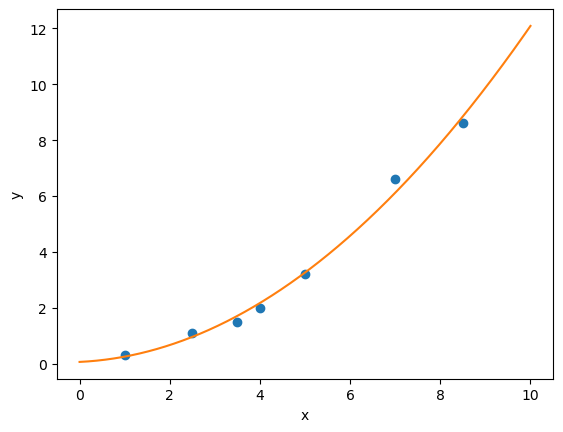

In [15]:
""" plot """


xp = np.linspace(0, 10, 1000) # 1D array # x-axis data grid
yp = beta[0] + beta[1] * xp + beta[2] * (xp**2)

plt.figure(1)
plt.clf()

plt.plot(x, y, 'o') # given data
plt.plot(xp, yp)

plt.xlabel('x')
plt.ylabel('y')

plt.show()

**Practice 2**

Model Specification:
$$
y = \beta_0 + \beta_1 f_1(x) + \cdots + \beta_k f_k(x)
$$

$$
X =
\begin{bmatrix}
1 & f_1(x_1) & \cdots &  f_k(x_1) \\
1 & f_1(x_2) & \cdots &  f_k(x_2) \\
\vdots  & \vdots & \vdots & \vdots \\
1 & f_1(x_n) & \cdots &  f_k(x_n) \\
\end{bmatrix}, \;
\mathbf{\beta} =
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_2 \\
\end{bmatrix}, \;
\mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
$$

$$
\hat{\mathbf{y}} = X \mathbf{\beta}
$$

$$
k = 3, \; f_1(x) = \exp(x), \; f_2(x) = \cos(x), \; f_3(x) = \ln(x)
$$

In [16]:
# 100 samples
data = np.genfromtxt('least_square_data.txt', dtype=np.float64, delimiter=',')

In [17]:
print(data.shape)

(100, 2)


In [18]:
x = data[:,0]
y = data[:,1]

In [19]:
n = len(x)

In [20]:
# constant
one = np.ones((n, ))

# f_1(x), f_2(x), f_3(x)
f1x = np.exp(x)
f2x = np.cos(x)
f3x = np.log(x)

# construct X
X = np.vstack((one, f1x, f2x, f3x)).T 

In [21]:
""" beta_hat """
beta, res, rank, s = linalg.lstsq(X, y)

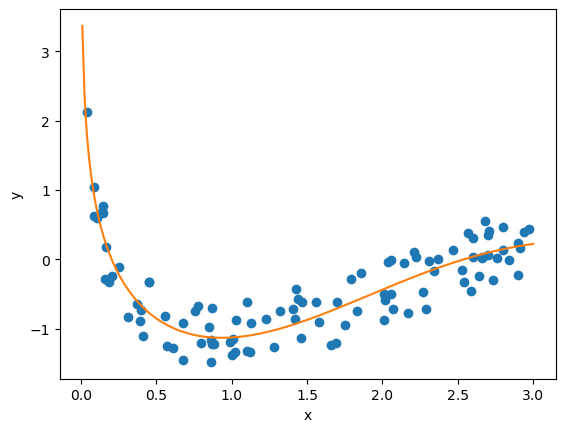

In [22]:
""" plot """


xp = np.linspace(1e-2, 3, 201) # 1D array # x-axis data grid
yp = beta[0] + beta[1] * np.exp(xp) + beta[2] * np.cos(xp) + beta[3] * np.log(xp)

plt.figure(1)
plt.clf()

plt.plot(x, y, 'o') # given data
plt.plot(xp, yp)

plt.xlabel('x')
plt.ylabel('y')

plt.show()